In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#폰트 설정
!apt-get update -qq
!apt-get install fonts-nanum -qq

import matplotlib.font_manager as fm
fm._load_fontmanager(try_read_cache=False)

plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

print('Korean Font Setting Success')

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Korean Font Setting Success


#지역별 카페 수, 인구, 매출 데이터 생성

In [2]:
#실습용 샘플 데이터 생성
np.random.seed(42)
data = {
    '지역': ['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원'] * 10,
    '카페수': np.random.randint(50,500,100),
    '인구': np.random.randint(100000,1000000,100),
    '매출': np.random.randint(1000,10000,100)
}

df = pd.DataFrame(data)
df.head(20)

,지역,카페수,인구,매출
0,서울,152,123247,6450
1,부산,485,124300,2663
2,대구,398,567281,6592
3,인천,320,707086,8392
4,광주,156,633556,2306
5,대전,121,448951,7776
6,울산,238,374329,6864
7,세종,70,819064,8526
8,경기,152,842139,9901
9,강원,171,532315,6575


In [3]:
# 데이터 형태 (행, 열)
print(f"행(rows): {df.shape[0]}, 열(columns): {df.shape[1]}")

행(rows): 100, 열(columns): 4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      100 non-null    object
 1   카페수     100 non-null    int64 
 2   인구      100 non-null    int64 
 3   매출      100 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.3+ KB


#결측값 확인

In [5]:
# 의도적으로 결측값 추가
df.loc[np.random.choice(df.index, 15, replace=False), '카페수'] = np.nan
df.loc[np.random.choice(df.index, 10, replace=False), '인구'] = np.nan
df.loc[np.random.choice(df.index, 8, replace=False), '매출'] = np.nan

df.head(10)

,지역,카페수,인구,매출
0,서울,152.0,123247.0,6450.0
1,부산,485.0,NaN,2663.0
2,대구,398.0,567281.0,6592.0
3,인천,320.0,707086.0,8392.0
4,광주,156.0,633556.0,2306.0
5,대전,121.0,448951.0,NaN
6,울산,238.0,374329.0,6864.0
7,세종,70.0,819064.0,8526.0
8,경기,NaN,842139.0,9901.0
9,강원,171.0,NaN,6575.0


In [6]:
df.isnull().sum()

,0
지역,0
카페수,15
인구,10
매출,8


In [7]:
(df.isnull().sum() / len(df)) *100 #결측값 비율 확인

,0
지역,0.0
카페수,15.0
인구,10.0
매출,8.0


#결측값 처리

In [8]:
df_drop = df.dropna()

print("origin data size: ", df.shape)
print("after NaN data remove: ", df_drop.shape)

origin data size:  (100, 4)
after NaN data remove:  (70, 4)


# 평균값으로 채우기

In [9]:
df_mean = df.copy()

df_mean['카페수'] = df_mean['카페수'].fillna(df_mean['카페수'].mean())
df_mean['인구'] = df_mean['인구'].fillna(df_mean['인구'].mean())
df_mean['매출'] = df_mean['매출'].fillna(df_mean['매출'].mean())

df_mean.isnull().sum()


,0
지역,0
카페수,0
인구,0
매출,0


#이상값 처리

In [10]:
df_clean = df_mean.copy() # 평균값으로 처리한 데이터 불러오기

In [11]:
df_clean.loc[5, '카페수'] = 999 # 극단값 추가
df_clean.head(10)

,지역,카페수,인구,매출
0,서울,152.000000,123247.000000,6450.000000
1,부산,485.000000,515730.811111,2663.000000
2,대구,398.000000,567281.000000,6592.000000
3,인천,320.000000,707086.000000,8392.000000
4,광주,156.000000,633556.000000,2306.000000
5,대전,999.000000,448951.000000,5701.391304
6,울산,238.000000,374329.000000,6864.000000
7,세종,70.000000,819064.000000,8526.000000
8,경기,285.470588,842139.000000,9901.000000
9,강원,171.000000,515730.811111,6575.000000


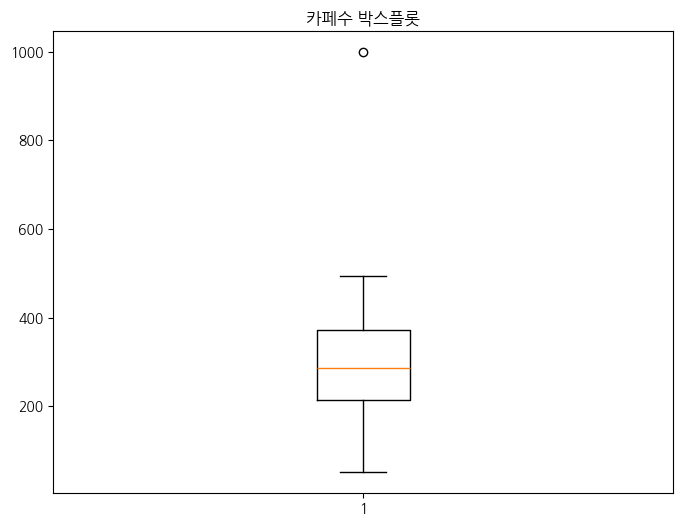

In [12]:
# 박스 플롯으로 이상값 확인
plt.figure(figsize=(8, 6))
plt.boxplot(df_clean['카페수'])
plt.title('카페수 박스플롯')

plt.show()

In [13]:
#IQR 방법으로 이상값 탐지
Q1 = df_clean['카페수'].quantile(0.25)
Q3 = df_clean['카페수'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 *IQR
upper = Q3 + 1.5 *IQR

df_no_outlier = df_clean[(df_clean['카페수'] > lower) & (df_clean['카페수'] < upper)]

print("이상값 제거 전: ", len(df_clean))
print("이상값 제거 후: ", len(df_no_outlier))

이상값 제거 전:  100
이상값 제거 후:  99


#groupby로 데이터 요약

In [14]:
df_no_outlier.groupby('지역')['카페수'].mean()

,카페수
지역,
강원,303.747059
경기,234.147059
광주,268.094118
대구,313.741176
대전,256.437908
부산,292.794118
서울,306.894118
세종,272.947059
울산,312.247059


In [15]:
df_no_outlier.groupby('지역')['카페수'].mean().sort_values(ascending=False) # ascending default true

,카페수
지역,
대구,313.741176
울산,312.247059
인천,307.200000
서울,306.894118
강원,303.747059
부산,292.794118
세종,272.947059
광주,268.094118
대전,256.437908


In [16]:
df_no_outlier.groupby('지역')['카페수'].agg(['mean','count','min','max']).sort_values('max')

,mean,count,min,max
지역,,,,
광주,268.094118,10,98.0,435.0
인천,307.200000,10,100.0,435.0
강원,303.747059,10,171.0,439.0
대전,256.437908,9,99.0,451.0
대구,313.741176,10,102.0,463.0
경기,234.147059,10,51.0,477.0
부산,292.794118,10,84.0,485.0
세종,272.947059,10,70.0,493.0
울산,312.247059,10,201.0,493.0


# 데이터 요약 확인

In [18]:
print("전처리 완료 후 데이터 요약")
df_no_outlier.describe()

전처리 완료 후 데이터 요약


,카페수,인구,매출
count,99.000000,99.000000,99.000000
mean,287.131907,516405.354658,5701.391304
std,115.376021,264231.307854,2398.275235
min,51.000000,112666.000000,1197.000000
25%,213.500000,284702.000000,3661.000000
50%,285.470588,515730.811111,5701.391304
75%,366.000000,737345.000000,7537.000000
max,495.000000,999684.000000,9958.000000


#Matplotlib 실습

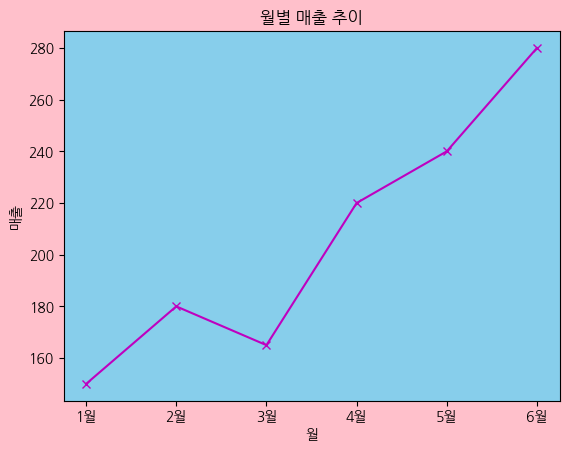

In [40]:
months=['1월', '2월', '3월', '4월', '5월', '6월']
sales=[150,180,165,220,240,280]

plt.figure(facecolor='pink')
plt.plot(months,sales, marker='x', color='m')
plt.title('월별 매출 추이')
plt.xlabel('월')
plt.ylabel('매출')
plt.gca().set_facecolor('skyblue')

plt.show()

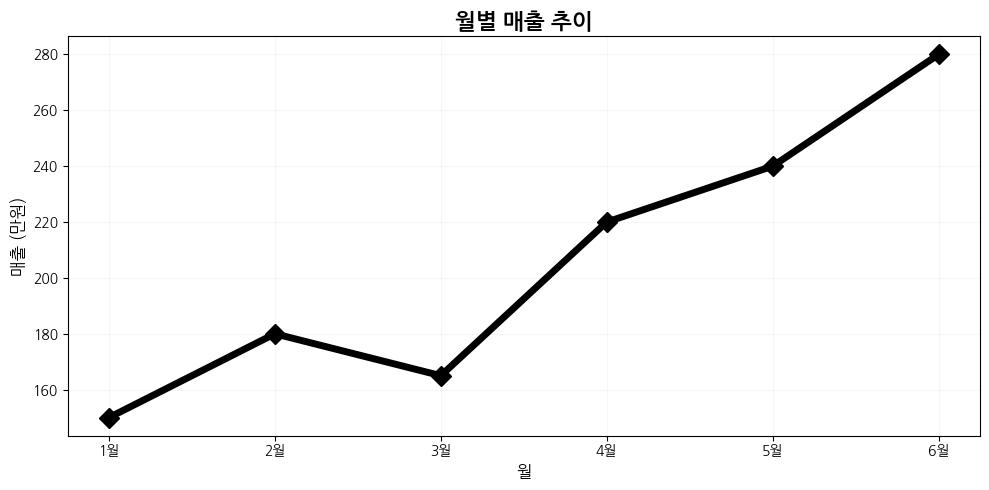

In [76]:
plt.figure(figsize=(10,5))
plt.plot(months, sales, marker='D', linewidth=5, markersize=10, color='k')
plt.title('월별 매출 추이', fontsize=16, fontweight='bold')
plt.xlabel('월', fontsize=12)
plt.ylabel('매출 (만원)', fontsize=12)
plt.grid(True, alpha=0.1)
plt.tight_layout()
plt.show()

1. 전체 추세: 전반적으로 1월부터 6월까지 매출이 점진적으로 증가하는 상승 추세를 보이고 있습니다. 이는 사업이 성장 궤도에 있으며 긍정적인 흐름을 유지하고 있음을 나타냅니다.

2. 특이점 및 실무적 해석:

2월 -> 3월 매출 감소 (180 -> 165): 2월에 상승했던 매출이 3월에 소폭 감소했습니다. 이 시점에 왜 매출이 줄었는지 분석이 필요합니다. 예를 들어, 3월은 계절적 비수기였는지, 특별한 프로모션이 없었는지, 혹은 경쟁사의 활동이 있었는지 등을 파악하여 원인을 규명하고 다음 해에는 이 시점의 매출 감소를 방어할 전략(예: 3월 한정 프로모션)을 세울 수 있습니다.
3월 이후 가파른 상승 (165 -> 220 -> 240 -> 280): 3월의 일시적인 하락 이후 4월부터 6월까지 매출이 꾸준히, 그리고 4월에는 비교적 가파르게 상승했습니다. 이는 4월부터 매출을 견인한 긍정적인 요인이 있었을 가능성이 높습니다. (예: 봄 시즌 특수, 새로운 마케팅 캠페인의 성공, 날씨 변화에 따른 제품 수요 증가 등) 이 시기의 성공 요인을 면밀히 분석하여 다른 달에도 적용할 수 있는 전략을 도출하는 것이 중요합니다.

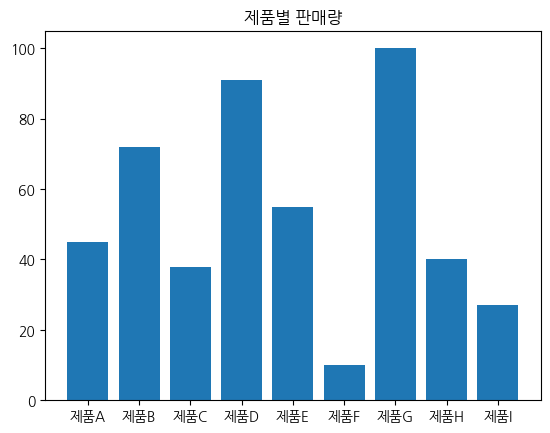

In [78]:
products=['제품A', '제품B', '제품C', '제품D', '제품E','제품F', '제품G', '제품H', '제품I' ]
quantities=[45,72,38,91,55,10,100,40,27]

plt.bar(products, quantities)
plt.title('제품별 판매량')

plt.show()

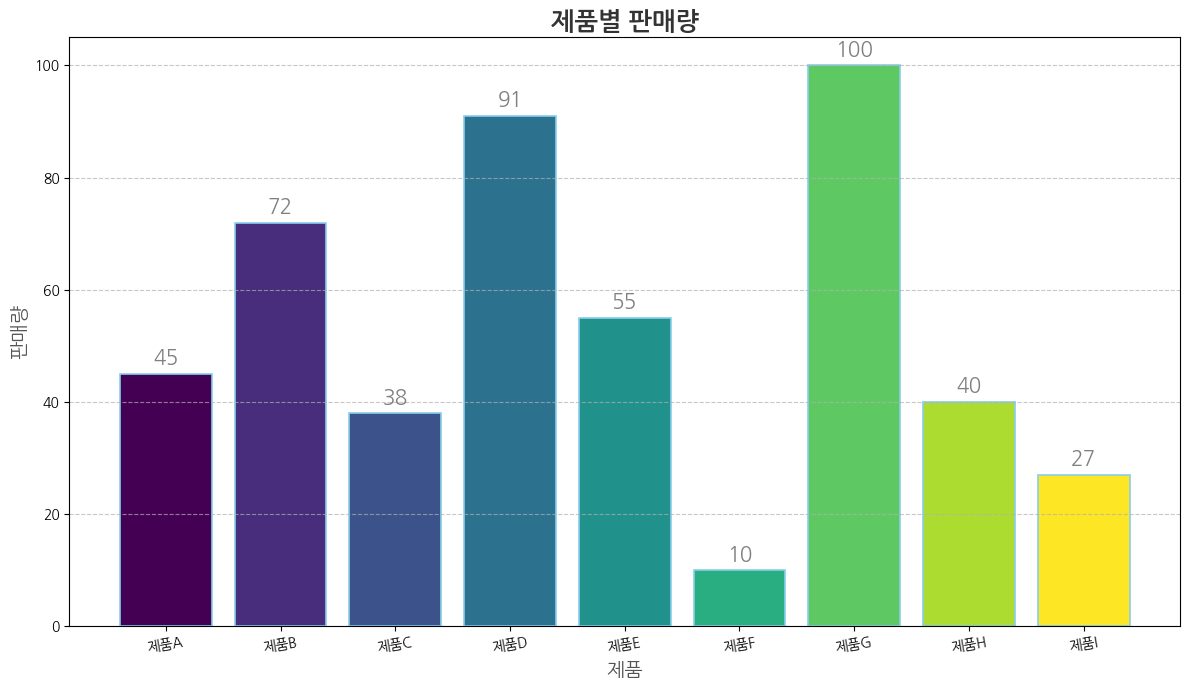

In [96]:
products=['제품A', '제품B', '제품C', '제품D', '제품E','제품F', '제품G', '제품H', '제품I' ]
quantities=[45,72,38,91,55,10,100,40,27]

plt.figure(figsize=(12, 7))

colors = plt.cm.viridis(np.linspace(0, 1, len(products)))

bars = plt.bar(products, quantities, color=colors, edgecolor='skyblue', linewidth=1.2)

plt.title('제품별 판매량', fontsize=18, fontweight='bold', color='#333333')
plt.xlabel('제품', fontsize=14, color='#555555')
plt.ylabel('판매량', fontsize=14, color='#555555')

plt.xticks(rotation=10, ha='center', fontsize=10)
plt.yticks(fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, yval, ha='center', va='bottom', fontsize=15, color='gray')

plt.tight_layout()
plt.show()

1위 제품 G제품
최저 제품 F제품
격차 90개
전략수립: 매출이 10배 차이가 난다. G제품에 홍보나 투자를 더하여 매출을 더 늘려가던지, F제품에 홍보나 투자를하여 균형을 맞출지는 회사의 운영방책에 따를것 같다.

1. 1위 제품 (G제품: 100개 판매) 전략:
성공 요인 분석 및 강화: G제품이 왜 가장 많이 팔리는지 면밀히 분석해야 합니다. 제품의 특징, 가격, 마케팅, 고객층, 경쟁사 대비 강점 등 성공 요인을 파악하고 이를 더욱 강화하는 전략을 수립합니다. 예를 들어, G제품의 핵심 USP(Unique Selling Proposition)를 찾아 다른 제품에도 적용하거나, G제품의 성공적인 마케팅 채널을 확장할 수 있습니다.

교차 판매 (Cross-selling) 및 상향 판매 (Up-selling): G제품 구매 고객에게 다른 관련 제품을 추천하거나, 더 고급/고가 버전의 G제품을 제안하여 객단가를 높이는 전략을 고려할 수 있습니다.

브랜드 앰버서더 활용: G제품의 열성 고객을 활용하여 제품 홍보를 강화하거나, 성공 사례를 공유하여 잠재 고객을 유치합니다.

2. 최저 제품 (F제품: 10개 판매) 전략:
문제점 진단: F제품의 판매 부진 원인을 정확히 파악해야 합니다. 제품 자체의 매력 부족, 가격 경쟁력, 마케팅 부족, 유통 채널 문제, 타겟 고객층 불일치 등 다양한 관점에서 분석이 필요합니다. 고객 설문조사, 시장 조사 등을 통해 구체적인 문제점을 찾아냅니다.

개선 또는 폐기 결정: 문제점 진단 후 개선 가능성이 있다면, 제품 리뉴얼, 가격 조정, 새로운 마케팅 전략 수립 등을 시도할 수 있습니다. 하지만 개선이 어렵거나 투자 대비 효과가 미미할 것으로 판단되면, 과감하게 제품 라인업에서 제외하는 것도 효율적인 전략이 될 수 있습니다.

재고 소진 프로모션: 만약 폐기를 결정한다면, 재고 부담을 줄이기 위해 할인, 묶음 상품, 증정 행사 등의 프로모션을 통해 효율적으로 재고를 소진하는 전략을 시행합니다.

3. 판매량 격차 90개에 대한 고려사항:
자원 재분배: 1위 제품과 최저 제품 간의 90개라는 큰 격차는 자원 배분의 효율성을 재고할 필요가 있음을 시사합니다. 성공적인 G제품에 더 많은 마케팅 예산과 인력을 집중하여 성장을 가속화하고, F제품에는 최소한의 자원만 투입하거나 전략적 결정을 통해 자원을 회수하는 것을 고려할 수 있습니다.

중간 판매량 제품군 관리: G제품과 F제품 외의 중간 판매량을 보이는 제품군(예: 제품D 91개, 제품B 72개 등)에 대해서도 각 제품의 잠재력과 현재 위치를 고려하여 맞춤형 전략(예: 특정 제품 프로모션, 마케팅 강화)을 수립하여 전체 매출 성장을 도모해야 합니다.

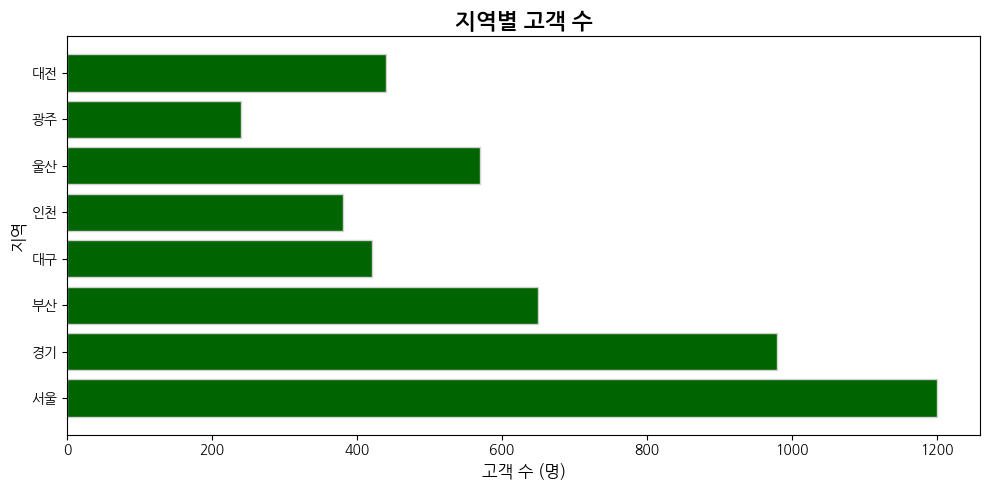

In [107]:
regions = ['서울', '경기', '부산', '대구', '인천', '울산', '광주', '대전']
customers=[1200,980,650,420,380,570,240,440] # 마지막 '500'을 제거하여 regions와 길이를 맞춤

plt.figure(figsize=(10, 5))
plt.barh(regions,customers, color='darkgreen', edgecolor='lightgray')
plt.title('지역별 고객 수', fontsize=16, fontweight='bold')
plt.xlabel('고객 수 (명)', fontsize=12)
plt.ylabel('지역', fontsize=12)
plt.tight_layout()
plt.show()

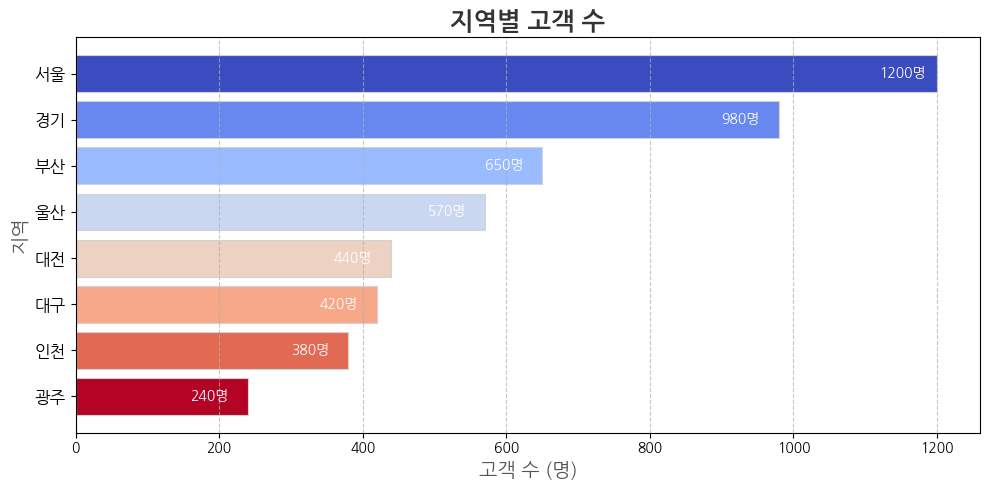

In [121]:
# 데이터 프레임 생성 (정렬을 위해)
df_customers = pd.DataFrame({
    '지역': ['서울', '경기', '부산', '대구', '인천', '울산', '광주', '대전'],
    '고객수': [1200,980,650,420,380,570,240,440]
})

# 고객 수 기준으로 내림차순 정렬
df_customers = df_customers.sort_values(by='고객수', ascending=True)

plt.figure(figsize=(10, 5))

# 막대 색상 팔레트 설정 (coolwarm 역순으로 적용하여 높은 값에 진한 색)
colors = plt.cm.coolwarm(np.linspace(0, 1, len(df_customers)))[::-1]

# 가로 막대 그래프 생성
bars = plt.barh(df_customers['지역'], df_customers['고객수'], color=colors, edgecolor='lightgray', linewidth=0.8)

plt.title('지역별 고객 수', fontsize=18, fontweight='bold', color='#333333')
plt.xlabel('고객 수 (명)', fontsize=14, color='#555555')
plt.ylabel('지역', fontsize=14, color='#555555')

plt.xticks(fontsize=10)
plt.yticks(fontsize=12)

plt.grid(axis='x', linestyle='--', alpha=0.7) # x축에만 격자 추가

# 각 막대 옆에 고객 수치 표시
for bar in bars:
    width = bar.get_width()
    plt.text(width - 80, bar.get_y() + bar.get_height()/2, f'{int(width)}명',
             va='center', ha='left', fontsize=10, color='w')

plt.tight_layout() # 그래프 요소들이 겹치지 않도록 자동 조정
plt.show()

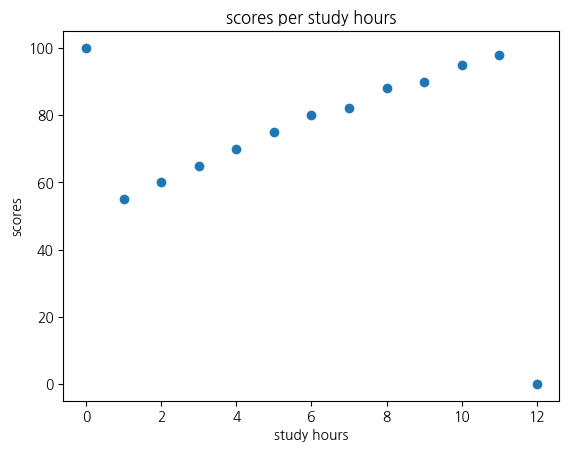

In [123]:
study_hours=np.array([0,1,2,3,4,5,6,7,8,9,10,11,12])
scores=np.array([100,55,60,65,70,75,80,82,88,90,95,98,0])

plt.scatter(study_hours, scores)
plt.title('scores per study hours')
plt.xlabel('study hours')
plt.ylabel('scores')
plt.show()

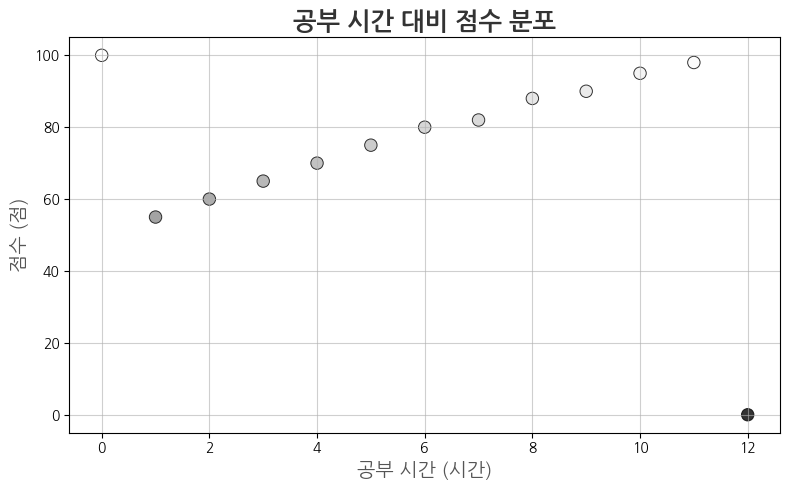

In [142]:
study_hours=np.array([0,1,2,3,4,5,6,7,8,9,10,11,12])
scores=np.array([100,55,60,65,70,75,80,82,88,90,95,98,0])

plt.figure(figsize=(8, 5))

plt.scatter(study_hours, scores, s=80, c=scores, cmap='gray', alpha=0.8, edgecolors='black', linewidths=0.7)

plt.title('공부 시간 대비 점수 분포', fontsize=18, fontweight='bold', color='#333333')
plt.xlabel('공부 시간 (시간)', fontsize=14, color='#555555')
plt.ylabel('점수 (점)', fontsize=14, color='#555555')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.grid(True, linestyle='-', alpha=0.6)

plt.tight_layout()
plt.show()

상관관계: 전반적으로 공부 시간이 늘어날수록 점수도 높아지는 경향을 보입니다. 이는 양의 상관관계가 있다고 볼 수 있습니다.

선형성: 대부분의 점들이 대략적으로 직선 형태를 따라 증가하는 것처럼 보입니다. 선형적인 관계가 있다고 추정할 수 있습니다.

예측 가능성: 이러한 양의 상관관계와 선형성으로 볼 때, 공부 시간을 알면 대략적인 점수를 예측할 가능성이 있습니다.

이상치: 공부 시간 12시간인데 점수가 0점인 데이터와 공부 시간이 0시간인데 점수가 100인 데이터 -->> 예상 : 공부를 너무 오래한 나머지 지각하여 시험을 치루지 못하였거나, 영재라 공부를 하지 않아도 시험점수를 만점을 받는 경우 혹은 조사과정에서 일어난 잘못된 데이터일 수 있습니다.

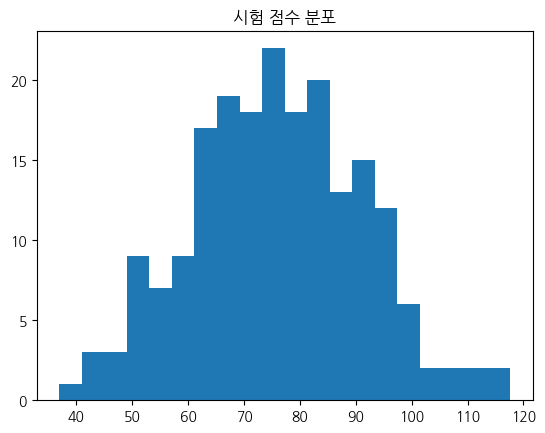

In [185]:
test_scores = np.random.normal(75,15,200) # 평균 75, 표준편차 15

plt.hist(test_scores, bins=20)
plt.title('시험 점수 분포')
plt.show()

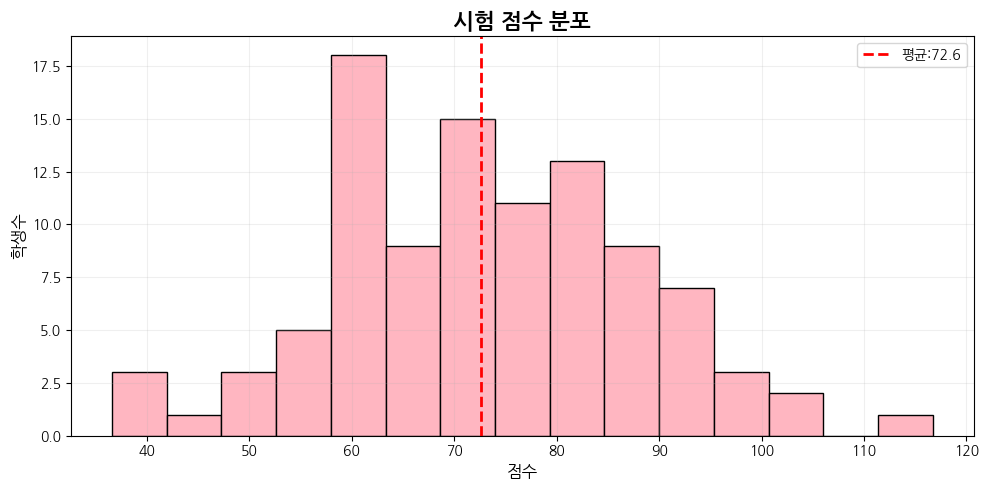

In [218]:
test_scores = np.random.normal(75,15,100) # 평균 75, 표준편차 15

plt.figure(figsize=(10,5))
plt.hist(test_scores, bins=15, color='lightpink', edgecolor='k', alpha=1)
plt.title('시험 점수 분포', fontsize=16, fontweight='bold')
plt.xlabel('점수', fontsize=12)
plt.ylabel('학생수', fontsize=12)
plt.axvline(test_scores.mean(), color='r', linestyle='--', linewidth=2, label=f'평균:{test_scores.mean():.1f}')
plt.legend()
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

분포 형태: 그래프는 평균을 중심으로 좌우 대칭에 가까운 종 모양형태를 보입니다. 이는 시험 점수가 정규 분포와 유사하게 분포하고 있음을 나타냅니다.

중심: 그래프의 가장 높은 막대들이 위치한 곳은 대략 75점 주변으로 보입니다. 이는 axvline으로 표시된 평균값과 일치합니다.

퍼짐: 점수 분포는 대략 40점대 후반에서 100점대 초반까지 넓게 퍼져 있지만, 대부분의 점수는 60점대에서 90점대에 집중되어 있습니다. 표준편차가 15점이므로, 평균(75점)을 기준으로 약 60점에서 90점 사이에 대부분의 데이터가 분포함을 시사합니다.

이상치: 히스토그램에서는 특정 이상치를 명확히 파악하기 어렵지만, 분포의 양 끝단에 위치한 아주 적은 수의 막대들은 평균에서 멀리 떨어진 점수(예: 매우 낮은 점수나 매우 높은 점수)를 나타냅니다.

[방법 1] 기본 서브플롯 - 2행 2열


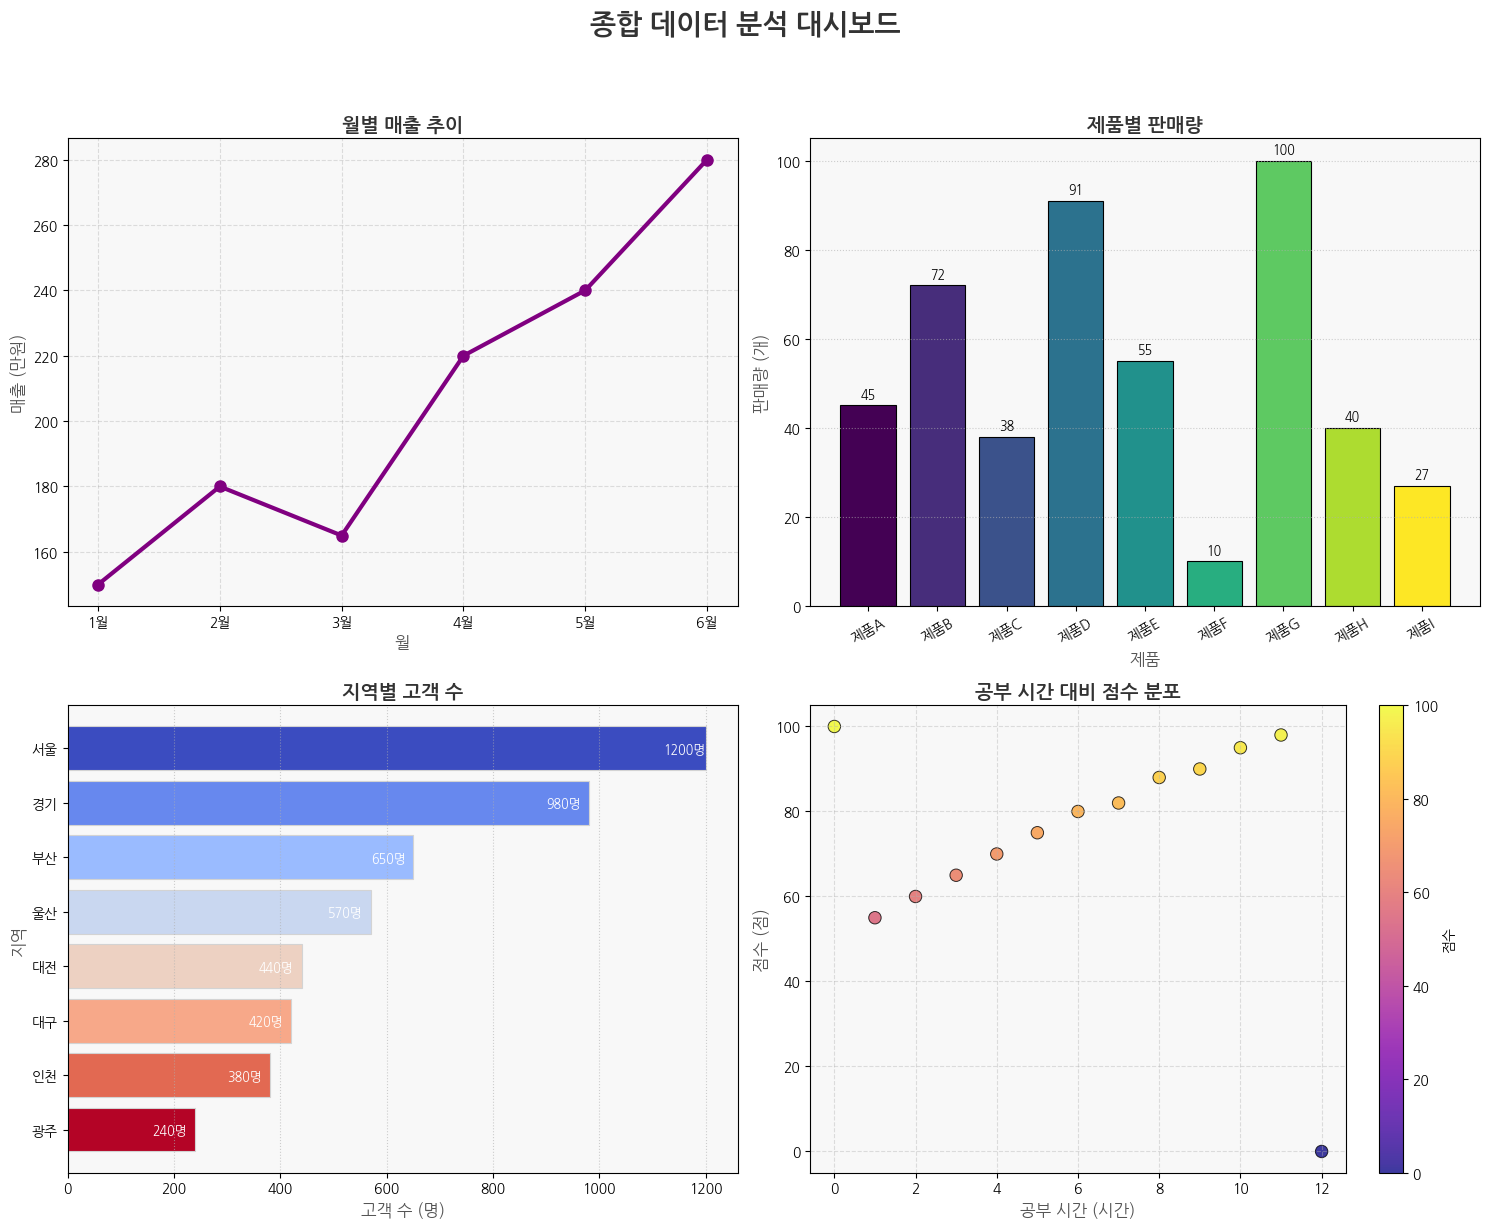

In [236]:
print("[방법 1] 기본 서브플롯 - 2행 2열")

fig, axes = plt.subplots(2, 2, figsize=(15, 12)) # 전체 그림 크기 조정

# Subplot 1: 월별 매출 추이 (Line Plot)
axes[0,0].plot(months, sales, marker='o', color='purple', linewidth=3, markersize=8)
axes[0,0].set_title('월별 매출 추이', fontsize=14, fontweight='bold', color='#333333')
axes[0,0].set_xlabel('월', fontsize=12, color='#555555')
axes[0,0].set_ylabel('매출 (만원)', fontsize=12, color='#555555')
axes[0,0].grid(True, alpha=0.4, linestyle='--')
axes[0,0].set_facecolor('#F8F8F8') # 서브플롯 배경색

# Subplot 2: 제품별 판매량 (Bar Plot)
colors_products = plt.cm.viridis(np.linspace(0, 1, len(products)))
bars_products = axes[0,1].bar(products, quantities, color=colors_products, edgecolor='black', linewidth=0.8)
axes[0,1].set_title('제품별 판매량', fontsize=14, fontweight='bold', color='#333333')
axes[0,1].set_xlabel('제품', fontsize=12, color='#555555')
axes[0,1].set_ylabel('판매량 (개)', fontsize=12, color='#555555')
axes[0,1].tick_params(axis='x', rotation=30, labelsize=10) # x축 레이블 회전
axes[0,1].grid(axis='y', linestyle=':', alpha=0.6)
for bar in bars_products:
    yval = bar.get_height()
    axes[0,1].text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval), ha='center', va='bottom', fontsize=9, color='black')
axes[0,1].set_facecolor('#F8F8F8')

# Subplot 3: 지역별 고객 수 (Horizontal Bar Plot)
# df_customers는 이미 전역으로 정렬되어 있으므로 그대로 사용
colors_customers = plt.cm.coolwarm(np.linspace(0, 1, len(df_customers)))[::-1] # coolwarm 컬러맵 사용
bars_customers = axes[1,0].barh(df_customers['지역'], df_customers['고객수'], color=colors_customers, edgecolor='lightgray', linewidth=0.8)
axes[1,0].set_title('지역별 고객 수', fontsize=14, fontweight='bold', color='#333333')
axes[1,0].set_xlabel('고객 수 (명)', fontsize=12, color='#555555')
axes[1,0].set_ylabel('지역', fontsize=12, color='#555555')
axes[1,0].grid(axis='x', linestyle=':', alpha=0.6)
for bar in bars_customers:
    width = bar.get_width()
    # 막대 안에 텍스트를 흰색으로 표시
    axes[1,0].text(width - 80, bar.get_y() + bar.get_height()/2, f'{int(width)}명',
             va='center', ha='left', fontsize=9, color='w') # 텍스트 색상 흰색으로 변경
axes[1,0].set_facecolor('#F8F8F8')

# Subplot 4: 공부 시간 대비 점수 분포 (Scatter Plot)
axes[1,1].scatter(study_hours, scores, s=80, c=scores, cmap='plasma', alpha=0.8, edgecolors='black', linewidths=0.7) # plasma 컬러맵 사용
axes[1,1].set_title('공부 시간 대비 점수 분포', fontsize=14, fontweight='bold', color='#333333')
axes[1,1].set_xlabel('공부 시간 (시간)', fontsize=12, color='#555555')
axes[1,1].set_ylabel('점수 (점)', fontsize=12, color='#555555')
axes[1,1].grid(True, alpha=0.4, linestyle='--')
# 컬러바 추가 (scatter plot의 점수 값에 따른 색상 변화를 보여줌)
cbar = fig.colorbar(axes[1,1].collections[0], ax=axes[1,1], orientation='vertical', label='점수')
axes[1,1].set_facecolor('#F8F8F8')

# 전체 대시보드 제목
plt.suptitle('종합 데이터 분석 대시보드', fontsize=20, fontweight='bold', color='#333333', y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.98]) # suptitle과 그래프가 겹치지 않도록 레이아웃 조정
plt.show()

[방법 2] 1행 3열 - 가로로 나열


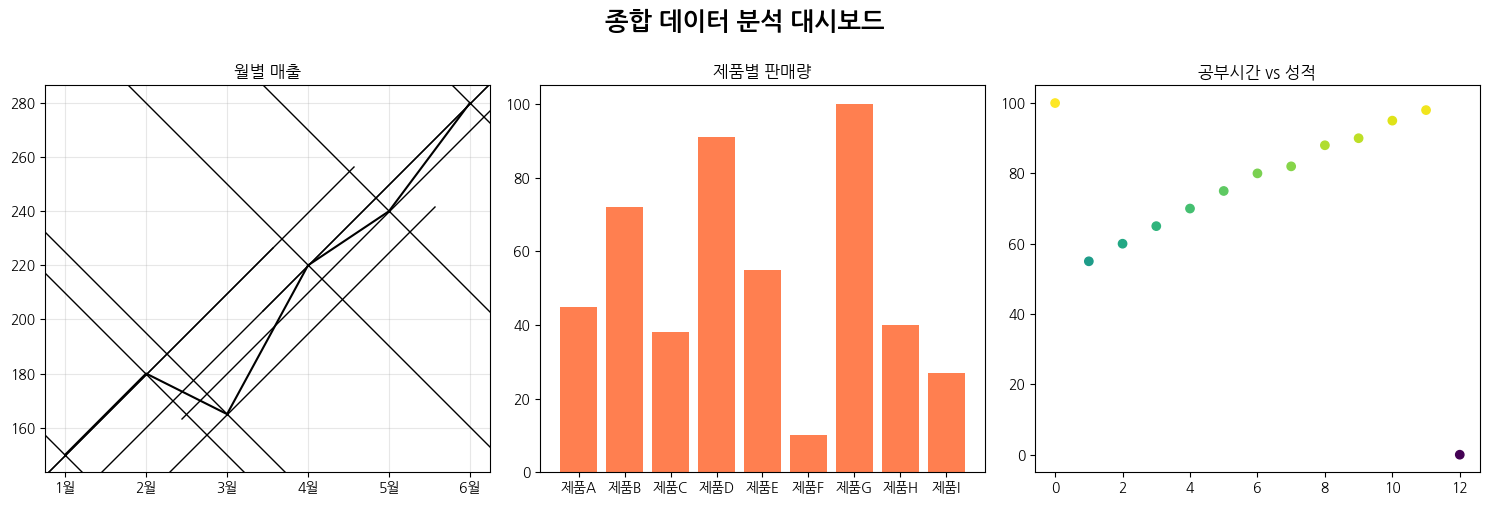

In [246]:
print("[방법 2] 1행 3열 - 가로로 나열")

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].plot(months, sales, marker='x', markersize=300, color='k')
axes[0].set_title('월별 매출')
axes[0].grid(True, alpha=0.3)

axes[1].bar(products, quantities, color='coral')
axes[1].set_title('제품별 판매량')

axes[2].scatter(study_hours, scores, c=scores, cmap='viridis')
axes[2].set_title('공부시간 vs 성적')

plt.suptitle('종합 데이터 분석 대시보드', fontsize=18, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

[방법 4] 비대칭 레이아웃 - subplort2grid


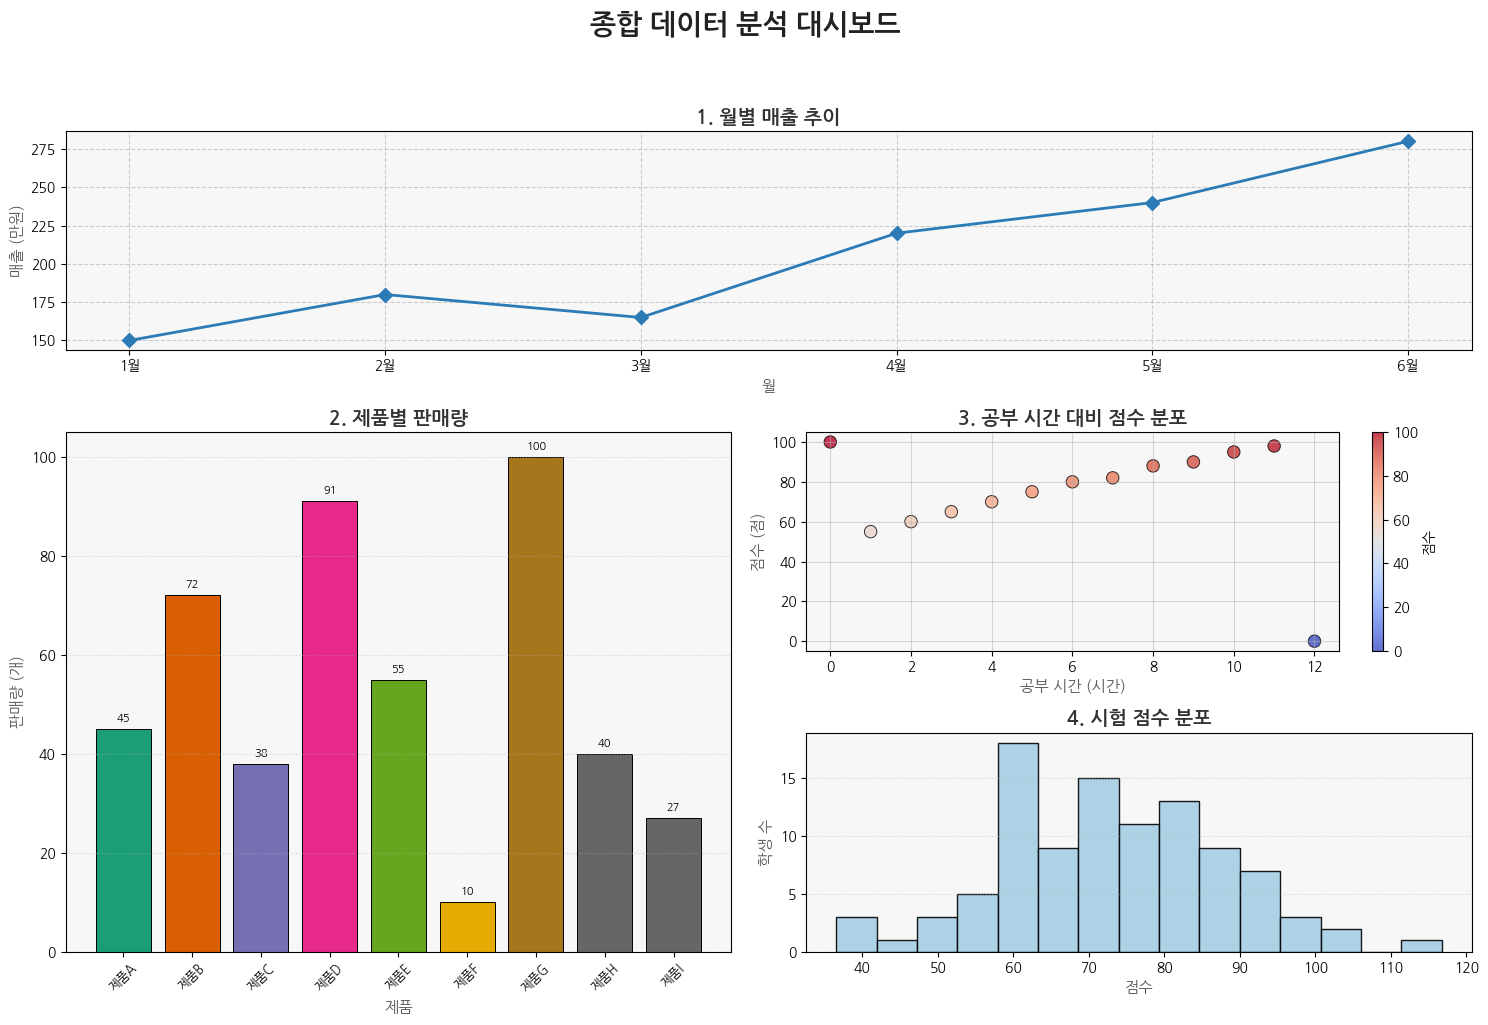

In [262]:
print('[방법 4] 비대칭 레이아웃 - subplort2grid')

fig = plt.figure(figsize=(15, 10)) # 전체 그림 크기 조정

# Subplot 1: 월별 매출 추이 (Line Plot) - 상단 전체
ax1 = plt.subplot2grid((3,2), (0,0), colspan=2)
ax1.plot(months, sales, marker='D', markersize=7, color='#2c7bb6', linewidth=2) # 마커, 색상, 두께 변경
ax1.set_title('1. 월별 매출 추이', fontsize=14, fontweight='bold', color='#333333')
ax1.set_xlabel('월', fontsize=11, color='#555555')
ax1.set_ylabel('매출 (만원)', fontsize=11, color='#555555')
ax1.grid(True, linestyle='--', alpha=0.6)
ax1.set_facecolor('#f7f7f7') # 배경색 추가

# Subplot 2: 제품별 판매량 (Bar Plot) - 좌측 중간 및 하단
ax2 = plt.subplot2grid((3,2), (1,0), rowspan=2)
colors_products = plt.cm.Dark2(np.linspace(0, 1, len(products))) # 다른 컬러맵 적용
bars_ax2 = ax2.bar(products, quantities, color=colors_products, edgecolor='black', linewidth=0.7)
ax2.set_title('2. 제품별 판매량', fontsize=14, fontweight='bold', color='#333333')
ax2.set_xlabel('제품', fontsize=11, color='#555555')
ax2.set_ylabel('판매량 (개)', fontsize=11, color='#555555')
ax2.tick_params(axis='x', rotation=45, labelsize=9) # x축 레이블 회전 (ha='right' 제거)
ax2.grid(axis='y', linestyle=':', alpha=0.5)
for bar in bars_ax2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval), ha='center', va='bottom', fontsize=8, color='black')
ax2.set_facecolor('#f7f7f7') # 배경색 추가

# Subplot 3: 공부 시간 대비 점수 분포 (Scatter Plot) - 우측 중간
ax3 = plt.subplot2grid((3,2), (1,1))
# 이전 설정에서 c=scores와 color='k' 충돌 오류가 있었으므로, colormap을 사용하도록 수정
ax3.scatter(study_hours, scores, s=80, c=scores, cmap='coolwarm', alpha=0.8, edgecolors='black', linewidths=0.7) # 컬러맵 변경
ax3.set_title('3. 공부 시간 대비 점수 분포', fontsize=14, fontweight='bold', color='#333333')
ax3.set_xlabel('공부 시간 (시간)', fontsize=11, color='#555555')
ax3.set_ylabel('점수 (점)', fontsize=11, color='#555555')
ax3.grid(True, linestyle='-', alpha=0.5)
cbar_ax3 = fig.colorbar(ax3.collections[0], ax=ax3, orientation='vertical', label='점수') # 컬러바 추가
ax3.set_facecolor('#f7f7f7') # 배경색 추가

# Subplot 4: 시험 점수 분포 (Histogram) - 우측 하단
ax4 = plt.subplot2grid((3,2), (2,1))
ax4.hist(test_scores, bins=15, color='#a6cee3', edgecolor='black', alpha=0.9) # 색상 및 bins 변경
ax4.set_title('4. 시험 점수 분포', fontsize=14, fontweight='bold', color='#333333')
ax4.set_xlabel('점수', fontsize=11, color='#555555')
ax4.set_ylabel('학생 수', fontsize=11, color='#555555')
ax4.grid(axis='y', linestyle=':', alpha=0.5)
ax4.set_facecolor('#f7f7f7') # 배경색 추가

# 전체 대시보드 제목
plt.suptitle('종합 데이터 분석 대시보드', fontsize=20, fontweight='bold', color='#222222', y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.98]) # suptitle과 그래프가 겹치지 않도록 레이아웃 조정
plt.show()

#타이타닉 시각화

In [265]:
import seaborn as sns
import pandas as pd

df =sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [266]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


*   성별에 따라 생존률? -> 막대그래프
*   객실 등급이 생존에 영향?
*   요금이 높을수록 생존?
*   나이에 따라 생존 패턴? -> 히스토그램

In [274]:
survival_rate_by_sex = df.groupby('sex')['survived'].mean()
print(survival_rate_by_sex)

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64


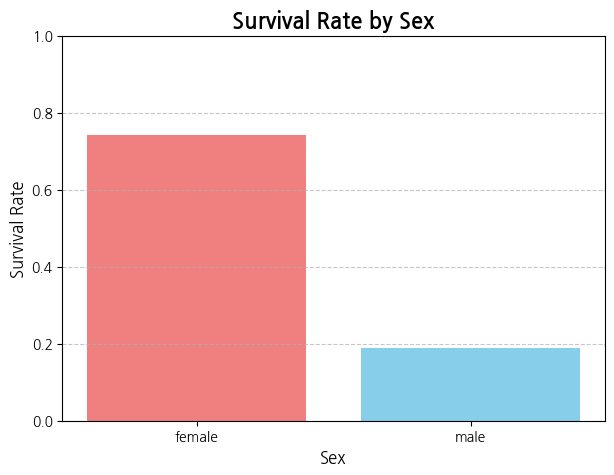

In [269]:
plt.figure(figsize=(7, 5))
plt.bar(survival_rate_by_sex.index, survival_rate_by_sex.values, color=['lightcoral', 'skyblue'])
plt.title('Survival Rate by Sex', fontsize=16, fontweight='bold')
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)
plt.ylim(0, 1) # Survival rate is between 0 and 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

*** Survival Rate by Sex ***  
여성의 생존 비율 약 0.8  
남성의 생존 비율 약 0.2  
여성이 남성보다 생존 비율이 약 4배 가량 높다.  
because 여성과 어린이 먼저라는 대피 원칙이 엄격히 적용된 결과.

In [275]:
survival_rate_by_pclass = df.groupby('pclass')['survived'].mean()
print(survival_rate_by_pclass)

pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64


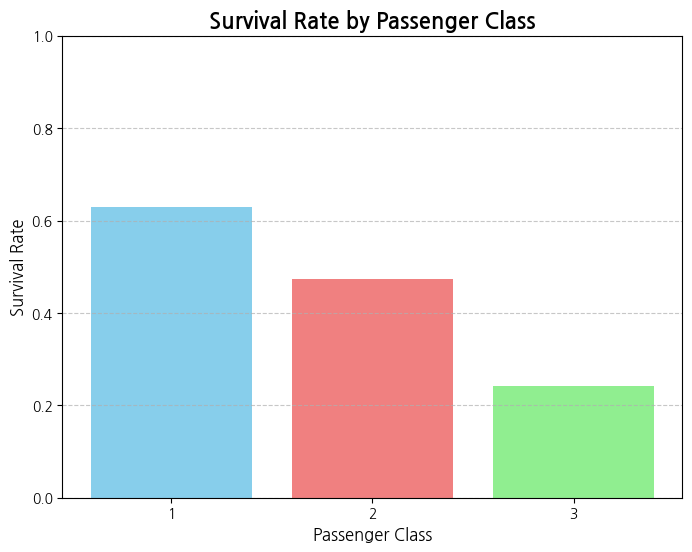

In [271]:
plt.figure(figsize=(8, 6))
plt.bar(survival_rate_by_pclass.index.astype(str), survival_rate_by_pclass.values, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Survival Rate by Passenger Class', fontsize=16, fontweight='bold')
plt.xlabel('Passenger Class', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)
plt.ylim(0, 1) # Survival rate is between 0 and 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

*** Survival Rate by Passenger Class ***  
1st 생존비율 : 약 0.6  
2ed 생존비율 : 약 0.5  
3rd 생존비율 : 약 0.2  
객실등급이 높을수록 생존 비율 또한 높다.

/tmp/ipython-input-1618188057.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='alive', y='fare', data=df, palette='viridis')


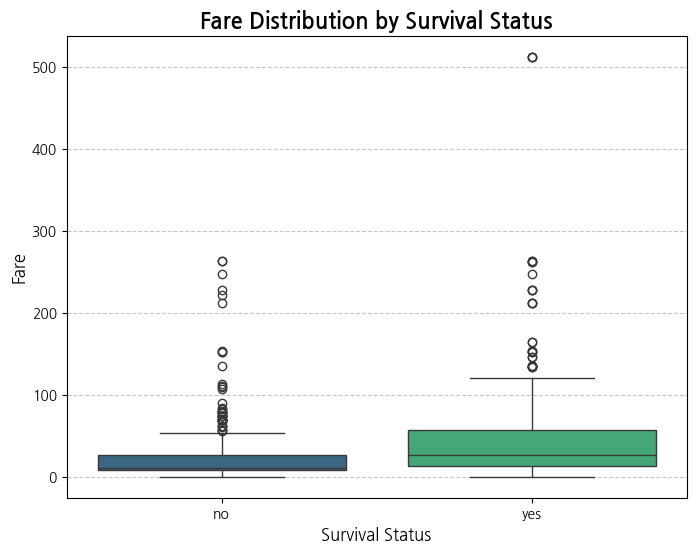

In [276]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='alive', y='fare', data=df, palette='viridis')
plt.title('Fare Distribution by Survival Status', fontsize=16, fontweight='bold')
plt.xlabel('Survival Status', fontsize=12)
plt.ylabel('Fare', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

*** Survival Rate by Fare ***  
box-plot을 보면 결측치가 매우 많은 것을 볼 수 있다.  
그러므로 요금과 생존의 상관관계는 큰 의미가 없다고 볼 수 있다.

In [282]:
print(f"'age' 열의 결측값 개수: {df['age'].isnull().sum()}")

'age' 열의 결측값 개수: 0


/tmp/ipython-input-583060429.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True)


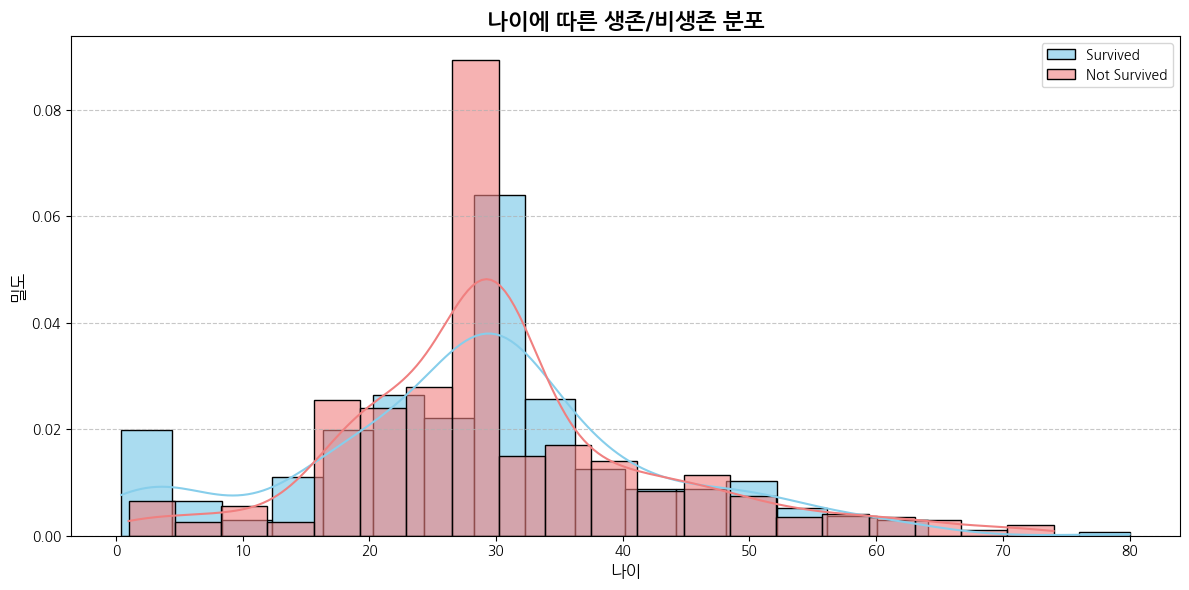

In [288]:
# 나이(Age) 데이터의 결측값 처리 (평균값으로 대체)
df['age'].fillna(df['age'].mean(), inplace=True)

# 생존자와 비생존자의 나이 데이터 분리
age_survived = df[df['survived'] == 1]['age']
age_not_survived = df[df['survived'] == 0]['age']

plt.figure(figsize=(12, 6))

# 생존자 나이 분포 히스토그램
sns.histplot(age_survived, bins=20, color='skyblue', label='Survived', kde=True, stat='density', alpha=0.7)
# 비생존자 나이 분포 히스토그램
sns.histplot(age_not_survived, bins=20, color='lightcoral', label='Not Survived', kde=True, stat='density', alpha=0.6) # alpha 값 조정

plt.title('나이에 따른 생존/비생존 분포', fontsize=16, fontweight='bold')
plt.xlabel('나이', fontsize=12)
plt.ylabel('밀도', fontsize=12) # stat='density'에 맞춰 y축 레이블 변경
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 나이에 따른 생존 패턴 분석:

*   **어린이 생존율**: 그래프에서 어린 나이(특히 0세~10세 구간)에서는 생존자(하늘색 막대)의 밀도가 비생존자(연한 산호색 막대)보다 높은 경향을 보입니다. 이는 '여성 우선, 어린이 우선' 원칙이 실제로 작용했을 가능성을 시사합니다.
*   **청년층 비생존율**: 20대 후반에서 30대 초반의 청년층에서는 비생존자(연한 산호색 막대)의 밀도가 생존자(하늘색 막대)보다 더 높게 나타납니다. 이는 이 연령대의 승객들이 구조 과정에서 더 불리했거나, 다른 연령대에 비해 희생된 경우가 많았을 수 있음을 의미합니다.
*   **노년층 생존율**: 고연령층(예: 60대 이상)에서는 데이터 포인트 자체가 적지만, 생존자와 비생존자 모두 밀도가 낮은 편입니다. 특정한 패턴을 파악하기는 어렵지만, 일반적으로 구조 상황에서 노년층은 불리할 수 있습니다.
*   **전반적인 분포**: 두 분포 모두 20대~30대에 가장 많은 승객이 있었음을 보여주며, 이는 당시 일반적인 인구 구성과 비슷할 수 있습니다.

결론적으로 타이타닉호의 침몰 당시 어린아이들에게는 구조의 우선순위가 있었으나, 젊은 성인층에서는 생존에 더 불리한 요인이 작용했을 수 있습니다.